# Ordinary Least Squares in Statsmodels (OLS) - Lab

## Introduction

In the previous Codealong, you looked at all the requirements for running an OLS simple regression using Statsmodels. You worked with the height-weight data to understand the process and all the necessary steps that must be performed. In this lab , you'll explore slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics

In [11]:
# Load necessary libraries and import the data
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [4]:
# Check the columns and first few rows
adv_df = pd.read_csv('advertising.csv')
adv_df.set_index('Unnamed: 0', inplace=True)
adv_df.head()


,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
# Get the 5-point statistics for data 
adv_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [42]:
# Describe the contents of this dataset
# Data has 200 rows with each representing one firm.  Each row contains
# the amount the amount each firm spent on three different advertising 
# channels as well as their sales volume for the same amount of time.  

## Step 2: Plot histograms with kde overlay to check the distribution of the predictors

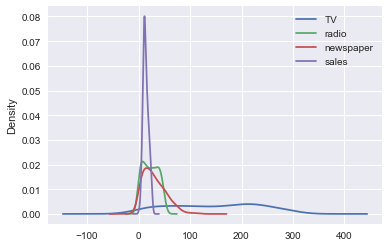

In [10]:
adv_df.plot.kde()

/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


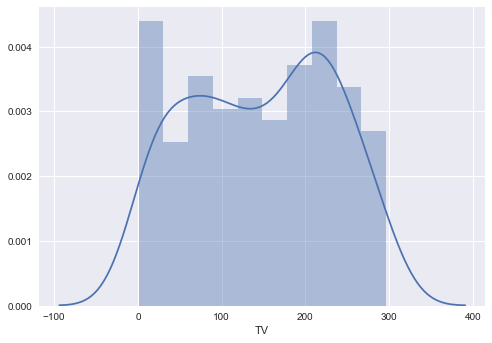

In [13]:
sns.distplot(adv_df['TV'], bins=10)

/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


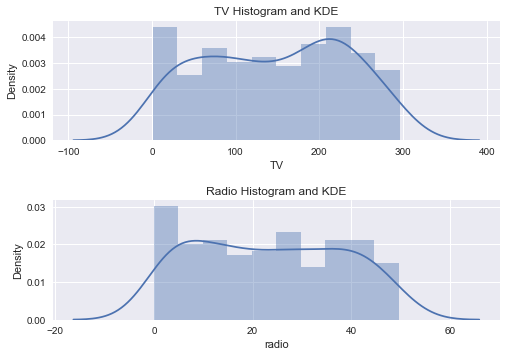

In [30]:
fig = plt.figure()

fig.subplots_adjust(hspace=.5)

ax = fig.add_subplot(211)
ax = sns.distplot(adv_df['TV'], bins=10)
ax.set_ylabel('Density')
ax.set_title('TV Histogram and KDE')

ax1 = fig.add_subplot(212)
ax1 = sns.distplot(adv_df['radio'], bins=10)
ax1.set_ylabel('Density')
ax1.set_title('Radio Histogram and KDE')
plt.show()

/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


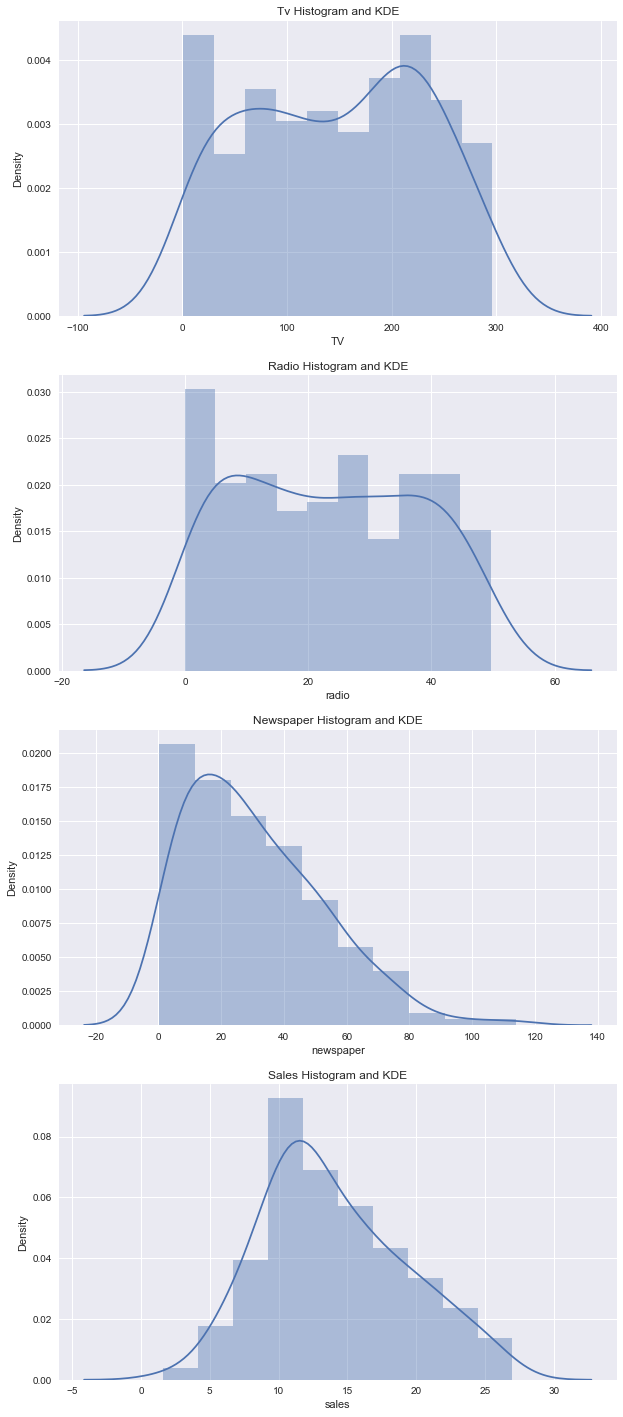

In [42]:
fig = plt.figure(figsize=(10,25))

pltnum = 1

for column in adv_df:
    
    ax = fig.add_subplot(410+pltnum)
    ax = sns.distplot(adv_df[column], bins=10)
    ax.set_ylabel('Density')
    ax.set_title(column.title() + ' Histogram and KDE')
    pltnum += 1 

plt.show()

In [ ]:
# Record your observations here 
# TV and radio spending have generally uniform distributions with TV having
# a slight peak in the higher values while Radio had one in the lower values.
# Newspaper spending distribution is heavily skewed right with most values
# being lower ones.  Sales is almost normally distributed with a right
# skewness. 


## Step 3: Test for the linearity assumption 

Use scatterplots to plot each predictor against the target variable

In [68]:
x = 1
for column in adv_df.columns[:3]:
    print(x, column)
    x+=1

1 TV
2 radio
3 newspaper


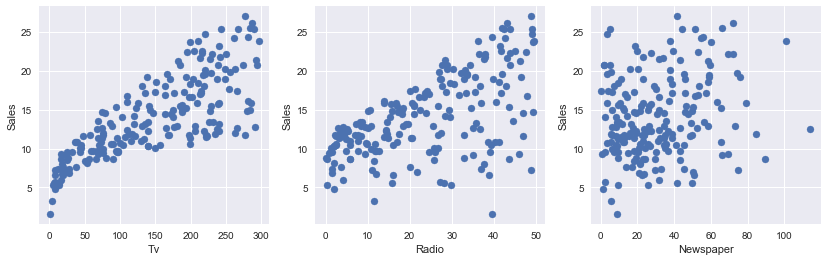

In [66]:
fig1 = plt.figure(figsize=(14,4))
pltnum = 1

for column in adv_df.columns[:3]:
    ax1 = fig1.add_subplot(130+pltnum)
    ax1.scatter(adv_df[column], adv_df['sales'])
    ax1.set_ylabel('Sales')
    ax1.set_xlabel(column.title())
    pltnum += 1 

plt.show()

In [67]:
# Record yor observations on linearity here 
# TV and radio spending scatter plots show a discernable linear 
# relationships with sales revenue while newspaper spending does not.  
# Newspapers will be eliminated from regression analysis because it 
# violates the linearity assumption.  
 

### Conclusion so far

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We'll move ahead with our analysis using TV and radio, and rule out newspaper because we believe it violates OLS assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. You'll learn about this later on.

## Step 4: Run a simple regression in Statsmodels with TV as a predictor

In [70]:
# import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols


# build the formula 
f = 'sales~TV'

# create a fitted model in one line
tvmodel = ols(formula=f, data=adv_df).fit()

## Step 5: Get Regression Diagnostics Summary

In [72]:
tvmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        16:13:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note here that the coefficients represent associations, not causations

## Step 6:  Draw a prediction line with data points on a scatter plot for X (TV) and Y (Sales)

Hint: You can use the `model.predict()` function to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [86]:
import numpy as np

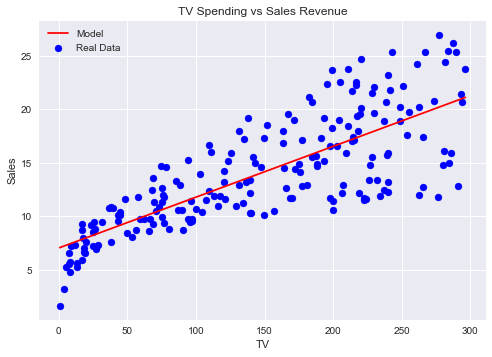

In [99]:
# create a DataFrame with the minimum and maximum values of TV
tvminmax_df = pd.DataFrame(np.array([adv_df['TV'].min(), adv_df['TV'].max()]),columns=['TV'])
#tvminmax_df

# make predictions for those x values and store them
tvminmax_df = tvminmax_df.assign(sales=tvmodel.predict(tvminmax_df))


# first, plot the observed data and the least squares line
plt.scatter(adv_df['TV'],adv_df['sales'],label='Real Data',color='b')
plt.plot(tvminmax_df['TV'],tvminmax_df['sales'],label='Model',color='r')
plt.legend()
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV Spending vs Sales Revenue')
plt.show()

## Step 7: Visualize the error term for variance and heteroscedasticity

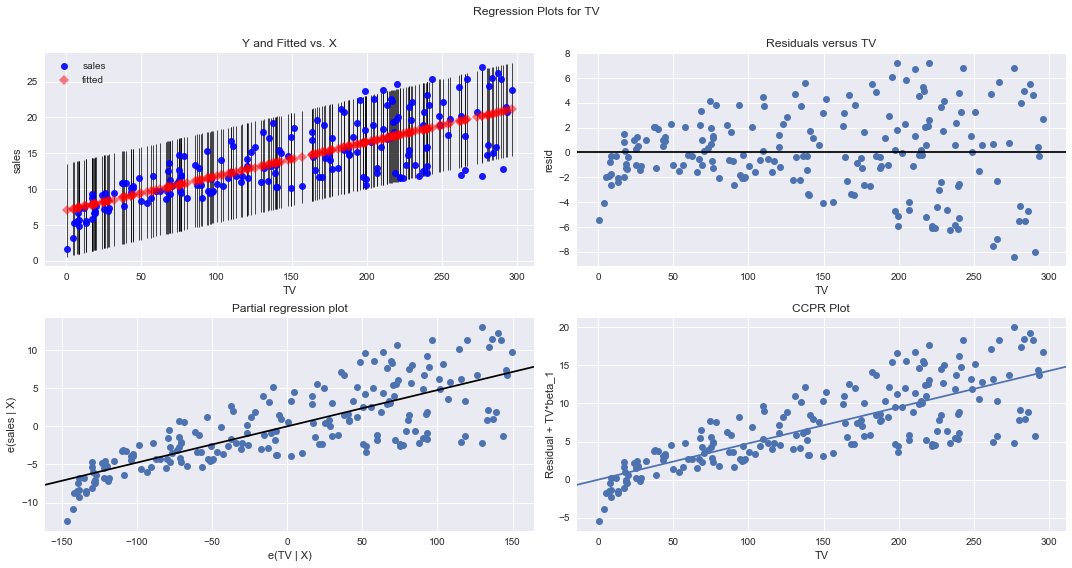

In [101]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(tvmodel, 'TV', fig=fig)
plt.show()

In [ ]:
# Record Your observations on heteroscedasticity
# Our model predicts actual values pretty well in that most actual values
# fall within the confidence interval of each of the predicted values. 
# Error seems to increase with higher values of spending.  The data
# seems to exhibit a bit of heterscedasticity with the residuals increasing
# in magnitude as the TV spending gets larger.  Technically, this violates
# one of the necessary assumptions for OLS regression analysis.

## Step 8: Check the normality assumptions by creating a QQ-plot

/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


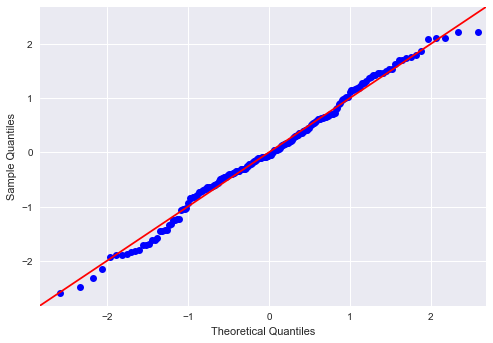

In [103]:
# Code for QQ-plot here
import scipy.stats as stats
tvresiduals = tvmodel.resid
fig = sm.graphics.qqplot(tvresiduals, dist=stats.norm, line='45', fit=True)
fig.show()

In [105]:
# Record Your observations on the normality assumption
# The residuals generally are normally distributed as there are not any
# egregious departures from the red(theoretical) line.  The TV model 
# therefore satisfies the normality assumption. 

## Step 9: Repeat the above for radio and record your observations

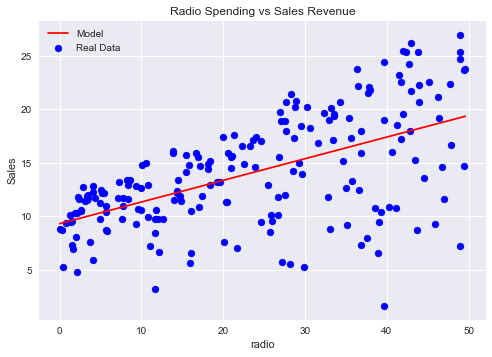

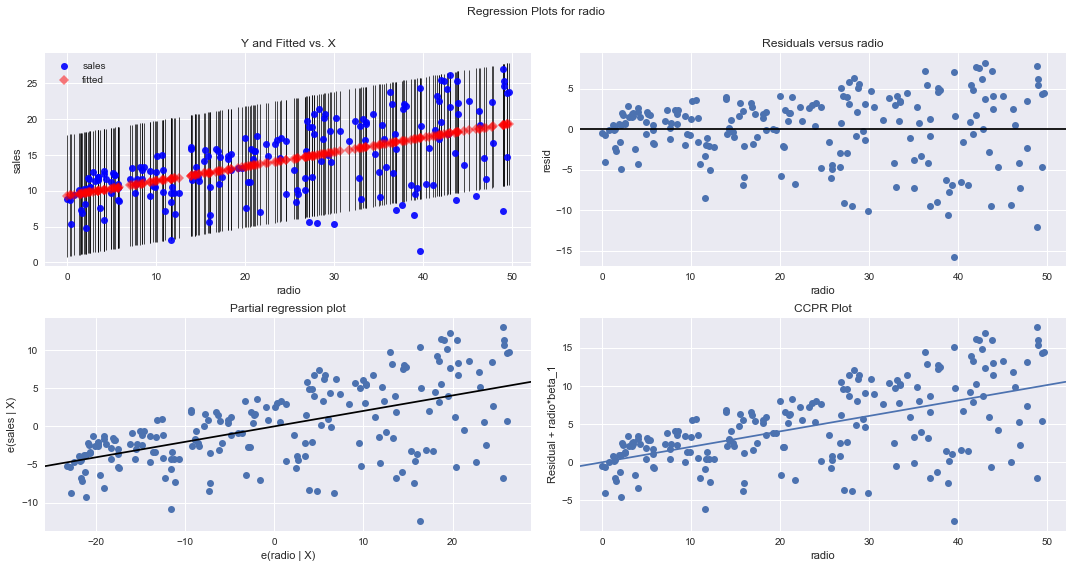

/Users/johnnguyen/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


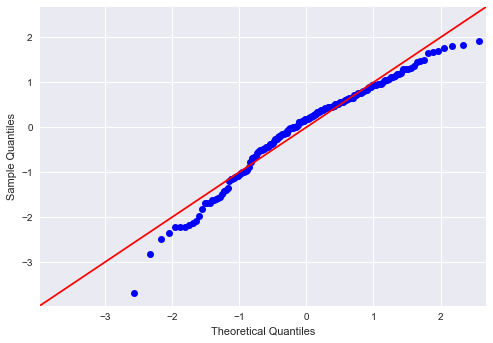

In [109]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f1 = 'sales~radio'

# create a fitted model in one line
radiomodel = ols(formula=f1, data=adv_df).fit()

radiominmax_df = pd.DataFrame(np.array([adv_df['radio'].min(), adv_df['radio'].max()]),columns=['radio'])

# make predictions for those x values and store them
radiominmax_df = radiominmax_df.assign(sales=radiomodel.predict(radiominmax_df))


# first, plot the observed data and the least squares line
plt.scatter(adv_df['radio'],adv_df['sales'],label='Real Data',color='b')
plt.plot(radiominmax_df['radio'],radiominmax_df['sales'],label='Model',color='r')
plt.legend()
plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('Radio Spending vs Sales Revenue')
plt.show()

fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(radiomodel, 'radio', fig=fig1)
plt.show()

radioresiduals = radiomodel.resid
fig2 = sm.graphics.qqplot(radioresiduals, dist=stats.norm, line='45', fit=True)
fig2.show()



In [110]:
radiomodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.35e-19
Time:                        11:23:47   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
radiomodel.params

Intercept    9.311638
radio        0.202496
dtype: float64

In [113]:
# Record your observations here for goodnes of fit 
# THe scatterplot shows some linearity so we will continue with the
# regression analysis.  The model's coefficient of determination indicates
# a poor fit and therefore prediction using the model should be taken lightly.
# It shows a positive relationship between radio spending and sales. 
# Compared to TV spending, the model actually shows that spending on radio
# is more effective at increasing sales.  Sales variability with radio
# spending shows heterscedasticity -- the model's residuals' magniitudes seem
# to increase with spending. Therefore the data sets fails in this assumption.
# The Q=Q plot shows the residuals being generally normally distributed,
# satisfying the OLS assumption.

## The Answer

Based on above analysis, you can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated the linearity assumption. `TV` and `radio` did not provide a high value for the coefficient of determination, where TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra preprocessing or use more advanced techniques. 

Remember there are lots of technqiues we can employ to fix these data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, you'll look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lab, you ran a complete regression analysis with a simple dataset. You looked for the regression assumptions before and after the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 